In [1]:
import time

import torch
from dataTreat.readData import LzgdDataset,img_transforms
import numpy as np
from torch.utils.data import Dataset,DataLoader
from torchvision import transforms
import os,cv2
import numpy as np
import tool.visualizationTool as visTool


train_img_dir='../data/trainImgPart'
train_label_dir='../data/trainLabel1Part'

trainDataset = LzgdDataset(train_img_dir,train_label_dir,img_transforms)
trainDataloader = DataLoader(trainDataset, batch_size=1, shuffle=True, num_workers=0, pin_memory=True)
type(trainDataset),len(trainDataset)

valid_img_dir='../data/validImg'
valid_label_dir='../data/validLabel1'

validDataset = LzgdDataset(valid_img_dir,valid_label_dir,img_transforms)
validDataloader = DataLoader(validDataset, batch_size=1, shuffle=True, num_workers=0, pin_memory=True)
#


TypeError: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.

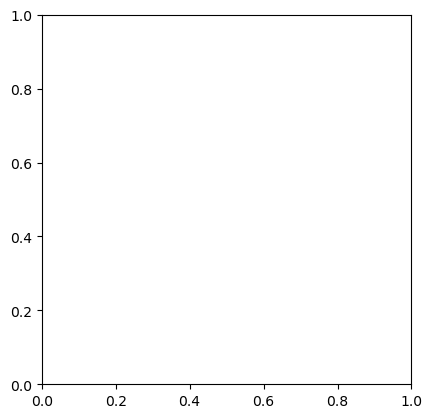

In [16]:
import torch
from torch import nn,optim
import pandas as pd
import numpy as np
from collections import Counter
import tool.tool as tool
from module.module import Module
from module.lzgdModule import Lzgd
from module.FCNModule import FCN
from module.unet import UNet
from module.unetplusplusModule import NestedUNet
from loss.dice import BCE_DICE_Loss

torch.cuda.is_available()
img,label=trainDataloader.dataset[0]
# visTool.showImage(label)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

#超参数
lr=1e-3
criterion = nn.BCEWithLogitsLoss().cuda()
model_unet=Module(model=UNet(n_channels=3,n_classes=3).cuda(),criterion=criterion,LR=lr,flag='unet')
optimizer = torch.optim.SGD(params=model_unet.model.parameters(),lr=lr)
model=model_unet.model

img=img.unsqueeze(dim=0).to(device=device)
pred=model(img)
visTool.showImage(pred.squeeze())


